# PR 02 SPSF
oleh Kemal Rizky Fadhlurrohman 10219113

Problem:
<br> Sebuah partikel bermuatan q bergerak dengan kecepatan 
$$
\vec{v}(t) = \vec{v_x}(t)\hat{i}+\vec{v_y}(t)\hat{j}
$$
<br> dalam ruang bermedan magnetik konstan
$$ \vec{B}=-\hat{k}B_z $$
Tentukan gerak partikel!

a. Tentukan hukum Newtonnya!
$$ \sum\vec{F}=m\vec{a} $$
<br> Gaya yang bekerja pada sistem adalah gaya akibat medan magnet, sehingga persamaan di atas menjadi
$$ \vec{F_B}=m\vec{a} $$
<br> Gaya magnet yang dialami partikel bermuatan q adalah
$$ \vec{F_B}=q\vec{v}\times \vec{B} $$
$$ \vec{F_B}=q (v_x(t)\hat{i}+v_y(t)\hat{j}) \times (-\hat{k}B_z) $$
$$ \vec{F_B}=q (-v_y(t)B_z\hat{i}+v_x(t)B_z\hat{j})  $$
<br> sehingga persamaan gerak partikel menjadi
$$ q (-v_y(t)B_z\hat{i}+v_x(t)B_z\hat{j}) = m \frac{d\vec{v}(t)}{dt} $$

b. Tuliskan persamaan diferensial terkoper antara kecepatan pada kedua arah!
<br> Pers. diferensial arah x:
$$ -\frac{qB_z}{m} v_y(t) = \frac{d v_x(t)}{d t} $$
<br> Pers. diferensial pada arah y:
$$ \frac{qB_z}{m} v_x(t) = \frac{d v_y(t)}{d t} $$

c. Selesaikan kedua persamaan diferensial sehingga dapat diperoleh $ v_x(t), v_y(t), x(t),$ dan $ y(t) $!
<br> Substitusikan persamaan pertama ke persamaan kedua sehingga didapat 
$$ -{(\frac{qB_z}{m})}^2 v_x(t) = \frac{d^2 v_x(t)}{{dt}^2} $$
<br> Lakukan hal yang sama untuk persamaan kedua
$$ -{(\frac{qB_z}{m})}^2 v_y(t) = \frac{d^2 v_y(t)}{{dt}^2} $$
<br> Solusi dari kedua persamaan diferensial orde dua di atas adalah sebagai berikut
$$ v_x(t) = k_1 \sin(\frac{qB_z}{m}t) + k_2 \sin(\frac{qB_z}{m}t) $$
<br> $$ v_y(t) = k_3 \sin(\frac{qB_z}{m}t) + k_4 \sin(\frac{qB_z}{m}t) $$

Kedua persamaan tersebut dapat ditulis sebagai 
$$ v_x(t) = A\sin(\frac{qB_z}{m}t + \phi) $$
<br> $$ v_y(t) = -A\cos(\frac{qB_z}{m}t + \phi) $$
<br> dimana A merupakan suatu konstanta yang menyatakan amplitudo dan $\phi$ merupakan suatu konstanta yang menyatakan sudut awal

<br> Jika diasumsikan $A=10, \phi=0$, serta $ q=1, B_z=1,$ dan $m=1$, maka dapat diperoleh grafik kecepatan arah x dan y sebagai berikut

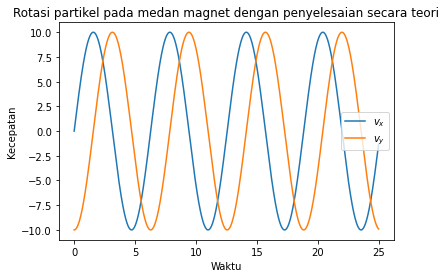

In [11]:
import numpy as np
import matplotlib.pyplot as plt

t=np.arange(0, 25, 0.005)

plt.figure()

vx = 10*np.sin(t)
vy = -10*np.cos(t)
plt.plot(t, vx, t, vy)
plt.title('Rotasi partikel pada medan magnet dengan penyelesaian secara teori')
plt.xlabel('Waktu')
plt.ylabel('Kecepatan')
plt.legend(['$v_x$', '$v_y$'])

plt.show()

d. Peroleh solusi numeriknya!
Tinjau persamaan diferensial terkopel dalam arah x dan arah y
$$ -\frac{qB_z}{m} v_y(t) = \frac{d v_x(t)}{d t} $$
<br> $$ \frac{qB_z}{m} v_x(t) = \frac{d v_y(t)}{d t} $$
dicari solusi menggunakan metode runge-kutta orde 4 dengan parameter $ q=1, B_z=1,$ dan $m=1$

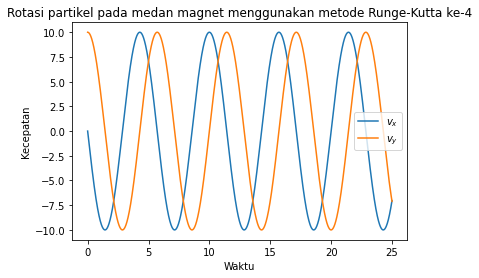

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def rk4(F, r, t, h):                              # mendefinisikan persamaan runge-kutta orde-4            
                                            
        k1 = h*F(r, t)                       
        k2 = h*F(r+0.5*k1, t+0.5*h)          
        k3 = h*F(r+0.5*k2, t+0.5*h)         
        k4 = h*F(r+k3, t+h)
        return (k1 + 2*k2 + 2*k3 + k4)/6    

def det_velocity(r, t):                           # mendefinisikan persamaan untuk menentukan v_x dan v_y  
        Bz= 1.1                         
        q = 0.4
        m = 0.4
        x, y = r[0], r[1]
        vx_dot = -q*Bz/m*y
        vy_dot = q*Bz/m*x
        return np.array([vx_dot, vy_dot], float)    

vx_init = 0.0
vy_init = 10.0
t_f = 25
dt=0.005                                       
tpoints = np.arange(0, t_f, dt)             

vx_pts, vy_pts  = [], []                   
r = np.array([vx_init, vy_init], float)               
for t in tpoints:
        vx_pts.append(r[0])          
        vy_pts.append(r[1])          
        r += rk4(det_velocity, r, t, dt) 
        
plt.figure(1)
plt.plot(tpoints, vx_pts, label='$v_x$')
plt.plot(tpoints, vy_pts, label='$v_y$')
plt.title('Rotasi partikel pada medan magnet menggunakan metode Runge-Kutta ke-4')
plt.xlabel('Waktu')
plt.ylabel('Kecepatan')
plt.legend(loc='best')

plt.show()